In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
import uncertainties.unumpy as unp
import scipy.constants as c
from scipy import stats

%matplotlib inline

# Messdaten

## Volumenbestimmung in cm$^3$

In [2]:
# Rezipient für beide
drez1 = ufloat(15.2, 0.7)
lrez1 = ufloat(39.1, 0.5)
Vrez1 = np.pi * lrez1 * drez1**2 / 4

drez2 = ufloat(2.2, 0.2)
lrez2 = ufloat(7.2, 0.5)
Vrez2 = np.pi * lrez2 * drez2**2 / 4

drez3 = ufloat(3.2, 0.2)
lrez3 = ufloat(8.1, 0.5)
Vrez3 = np.pi * lrez3 * drez3**2 / 4

drez4 = ufloat(4.0, 0.2)
lrez4 = ufloat(12.9, 0.5)
Vrez4 = np.pi * lrez4 * drez4**2 / 4

VRez = Vrez1 + Vrez2 + Vrez3 + Vrez4
print("V-Rezipient = ", VRez)



# Schlauch für beide
dS = ufloat(3.9, 0.5)
lS = ufloat(39, 0.5)
VS = np.pi * lS * dS**2 / 4
print("V-Schlauch = ", VS)



# Nadelventil
dnadel = ufloat(1.0, 0.5)
lnadel = ufloat(2.5, 0.5)
Vnadel = np.pi * lnadel * dnadel**2 / 4

# Kugelventil
dkugel = ufloat(1.6, 0.5)
lkugel = ufloat(7.4, 0.2)
Vkugel = np.pi * lkugel * dkugel**2 / 4

# T-Stück für das Nadelventil
dnadelT1 = ufloat(4, 0.2)
lnadelT1 = ufloat(10, 0.2)
VnadelT1 = np.pi * lnadelT1 * dnadelT1**2 / 4

dnadelT2 = ufloat(1, 0.2)
lnadelT2 = ufloat(2.4, 0.5)
VnadelT2 = np.pi * lnadelT2* dnadelT2**2 / 4

VnadelT = VnadelT1 + VnadelT2
VNadel = Vnadel + Vkugel + VnadelT
print("V-Nadelventil + T-Stück = ", VNadel)



# T-Stück (von der Turbopumpe) für beide
dturbo1 = ufloat(4, 0.5)
lturbo1 = ufloat(16, 0.5)
Vturbo1 = np.pi * lturbo1 * dturbo1**2 / 4

dturbo2 = ufloat(3.9, 0.5)
lturbo2 = ufloat(4.5, 0.5)
Vturbo2 = np.pi * lturbo2 * dturbo2**2 / 4

VTurbo = Vturbo1 + Vturbo2
print("V-Turbo = ", VTurbo)



# T-Stück (pirani) nur für Drehschieberpumpe
dpirani1 = ufloat(1.3, 0.2)
lpirani1 = ufloat(8, 0.2)
Vpirani1 = np.pi * lpirani1 * dpirani1**2 / 4

dpirani2 = ufloat(1.2, 0.2)
lpirani2 = ufloat(3.3, 0.5)
Vpirani2 = np.pi * lpirani2 * dpirani2**2 / 4

VPirani = Vpirani1 + Vpirani2
print("V-Pirani = ", VPirani)



# T-Stück (anschluss) nur für Drehschieberpumpe
dan1 = ufloat(4, 0.2)
lan1 = ufloat(13, 0.2)
Van1 = np.pi * lan1 * dan1**2 / 4

dan2 = ufloat(1.6, 0.2)
lan2 = ufloat(2.5, 0.5)
Van2 = np.pi * lan2 * dan2**2 / 4

VAn = Van1 + Van2
print("V-Anschluss = ", VAn)



# Gesamtvolumen in l für die Drehschieberpumpe
VD = VRez + VS + VNadel + VTurbo + VPirani + VAn
VD = VD / 1000
print("VD = ", VD)

VT = VRez + VS + VNadel + VTurbo
VT = VT / 1000
print("VT = ", VT)

V-Rezipient =  (7.3+/-0.7)e+03
V-Schlauch =  (4.7+/-1.2)e+02
V-Nadelventil + T-Stück =  144+/-16
V-Turbo =  (2.5+/-0.5)e+02
V-Pirani =  14+/-4
V-Anschluss =  168+/-17
VD =  8.4+/-0.7
VT =  8.2+/-0.7


## Daten für die Drehschieberpumpe

In [3]:
# Anfangsdruck p0 = 1013 mbar
p0D = 1013

# Enddruck pe = 0.02 mbar
peD = 0.02

# Daten für die p(t)-Kurve der Drehschieberpumpe
p_D, t_1D, t_2D, t_3D, t_4D, t_5D = np.genfromtxt('data/p(t)-Kurve-Drehschieberpumpe.txt', unpack=True)

# Daten für die Leckratenmessung der Drehschieberpumpe
# Anfangsdruck p_g = 0.1 mbar
p_gD1 = 0.1
pD1, t1D1, t2D1, t3D1 = np.genfromtxt('data/Leckratenmessung-0.1mbar-Drehschieberpumpe.txt', unpack=True)

# Anfangsdruck p_g = 0.4 mbar
p_gD2 = 0.4
pD2, t1D2, t2D2, t3D2 = np.genfromtxt('data/Leckratenmessung-0.4mbar-Drehschieberpumpe.txt', unpack=True)

# Anfangsdruck p_g = 0.6 mbar
p_gD3 = 0.6
pD3, t1D3, t2D3, t3D3 = np.genfromtxt('data/Leckratenmessung-0.6mbar-Drehschieberpumpe.txt', unpack=True)

# Anfangsdruck p_g = 0.8 mbar
p_gD4 = 0.8
pD4, t1D4, t2D4, t3D4 = np.genfromtxt('data/Leckratenmessung-0.8mbar-Drehschieberpumpe.txt', unpack=True)

# Anfangsdruck p_g = 1.0 mbar
p_gD5 = 1.0
pD5, t1D5, t2D5, t3D5 = np.genfromtxt('data/Leckratenmessung-1.0mbar-Drehschieberpumpe.txt', unpack=True)


## Daten für die Turbopumpe

In [4]:
# Anfangsdruck p0 = 5 * 10^-3 mbar
p0T = 5 * 10**(-3)

# Enddruck pe = 2 * 10^-5 mbar
peT = 2 * 10**(-5)

# Daten für die p(t)-Kurve der Drehschieberpumpe
p_T, t_1T, t_2T, t_3T, t_4T, t_5T, t_6T = np.genfromtxt('data/p(t)-Kurve-Turbopumpe.txt', unpack=True)
p_T *= 10**(-4)

# Daten für die Leckratenmessung der Drehschieberpumpe
# Anfangsdruck p_g = 5 * 10^-5 mbar
p_gT1 = 5 * 10**(-5)
pT1, t1T1, t2T1, t3T1 = np.genfromtxt('data/Leckratenmessung-5mbar-Turbopumpe.txt', unpack=True)
pT1 *= 10**(-4)

# Anfangsdruck p_g = 10 * 10^-5 mbar
p_gT2 = 10 * 10**(-5)
pT2, t1T2, t2T2, t3T2 = np.genfromtxt('data/Leckratenmessung-10mbar-Turbopumpe.txt', unpack=True)
pT2 *= 10**(-4)

# Anfangsdruck p_g = 15 * 10^-5 mbar
p_gT3 = 15 * 10**(-5)
pT3, t1T3, t2T3, t3T3 = np.genfromtxt('data/Leckratenmessung-15mbar-Turbopumpe.txt', unpack=True)
pT3 *= 10**(-4)

# Anfangsdruck p_g = 20 * 10^-5 mbar
p_gT4 = 20 * 10**(-5)
pT4, t1T4, t2T4, t3T4 = np.genfromtxt('data/Leckratenmessung-20mbar-Turbopumpe.txt', unpack=True)
pT4 *= 10**(-4)

# Funktionen

In [5]:
def f(x, a, b):
    return a * x + b

## Funktion zur Bestimmung des Saugvermögens S aus der Leckrate

In [6]:
def Leckrate(p, p_g, t1, t2, t3, V, name):
    n = len(p)
    t = np.zeros(n)
    terr = np.zeros(n)
    
    # Mittelwert und Fehler der Zeit
    for i in range(n):
        t[i] = (t1[i] + t2[i] + t3[i])/3
        terr[i] = stats.sem([t1[i], t2[i], t3[i]])
        
    # Fehler vom Druck
    perr = p * 0.1
    
    # lineare Regression
    params, covariance = curve_fit(f, t, p)
    errors = np.sqrt(np.diag(covariance))
    
    # plottet das ganze
    x = np.linspace(t[0]-20, t[-1]+20, 20)
    plt.errorbar(t, p, xerr=terr, yerr=perr, c='blue', fmt='o', label='Messdaten')
    plt.plot(x, f(x, *params), c='red', label='lineare Regression')
    plt.xlabel(r'$t$ / s')
    plt.ylabel(r'$p$ / mbar')
    plt.xlim(t[0]-20, t[-1]+20)
    plt.legend(loc='best')
    plt.savefig("pictures/Leck-"+name+".pdf")
    plt.close()
    
    # Berechnung des Saugvermögens aus der Steigung
    S = V * params[0] / p_g
    
    print("Druck p[mbar] =", p)
    print("Fehler vom Druck perr =", perr)
    print("Mittelwert der Zeit t[s] =", t)
    print("Fehler der Zeit terr =", terr)
    print("Parameter a und b =", params, " +- ", errors)
    print("Saugvermögen S[l/s] =", S)
    print(" ")
    

## Funktion zur Bestimmung des Saugvermögens S aus der p(t)-Kurve für die Drehschieberpumpe

In [7]:
def ptKurveDreh(p, p0, pe, t1, t2, t3, t4, t5, V, name):
    n = len(p)
    t = np.zeros(n)
    terr = np.zeros(n)
    V = np.array([V])

    # Mittelwert und Fehler der Zeit
    for i in range(n):
        t[i] = (t1[i] + t2[i] + t3[i] + t4[i] + t5[i]) / 5
        terr[i] = stats.sem([t1[i], t2[i], t3[i], t4[i], t5[i]])
    print("t = ", t)
    print("terr = ", terr)

    # Fehler vom Druck
    perr = p * 0.1
    
    # y-Achse
    logP = -np.log( (p-pe) / (p0-pe) ) * unp.nominal_values(V)
    print("y-Achse des Plottes =", logP)
    
    
    # Bereiche bestimmen und lineare Regression
    t_1 = t[0:3]
    terr_1 = terr[0:3]
    logP_1 = logP[0:3]
    params_1, covariance_1 = curve_fit(f, t_1, logP_1)
    errors_1 = np.sqrt(np.diag(covariance_1))
    t1 = np.linspace(t_1[0]-10, t_1[-1]+10)
    print("Parameter a und b =", params_1, "+-", errors_1)
    
    t_2 = t[3:9]
    terr_2 = terr[3:9]
    logP_2 = logP[3:9]
    params_2, covariance_2 = curve_fit(f, t_2, logP_2)
    errors_2 = np.sqrt(np.diag(covariance_2))
    t2 = np.linspace(t_2[0]-10, t_2[-1]+10)
    print("Parameter a und b =", params_2, "+-", errors_2)
    
    t_3 = t[9:14]
    terr_3 = terr[9:14]
    logP_3 = logP[9:14]
    params_3, covariance_3 = curve_fit(f, t_3, logP_3)
    errors_3 = np.sqrt(np.diag(covariance_3))
    t3 = np.linspace(t_3[0]-10, t_3[-1]+10)
    print("Parameter a und b =", params_3, "+-", errors_3)
    
    t_4 = t[14:18]
    terr_4 = terr[14:18]
    logP_4 = logP[14:18]
    params_4, covariance_4 = curve_fit(f, t_4, logP_4)
    errors_4 = np.sqrt(np.diag(covariance_4))
    t4 = np.linspace(t_4[0]-10, t_4[-1]+10)
    print("Parameter a und b =", params_4, "+-", errors_4)
    
    
    # plottet alles
    plt.errorbar(t_1, logP_1, xerr=terr_1, yerr=0, c='green', fmt='.')
    plt.plot(t1, f(t1, *params_1), c='green')
    
    plt.errorbar(t_2, logP_2, xerr=terr_2, yerr=0, c='blue', fmt='.')
    plt.plot(t2, f(t2, *params_2), c='blue')
    
    plt.errorbar(t_3, logP_3, xerr=terr_3, yerr=0, c='yellow', fmt='.')
    plt.plot(t3, f(t3, *params_3), c='yellow')
    
    plt.errorbar(t_4, logP_4, xerr=terr_4, yerr=0, c='red', fmt='.')
    plt.plot(t4, f(t4, *params_4), c='red')
    
    plt.xlabel(r'$t$ / s')
    plt.ylabel(r'-ln$\left(\frac{p-p_e}{p_0-p_e}\right)\cdot V_0$ / l')
    plt.xlim(t[0]-20, t[-1]+20)
    plt.legend(loc='best')
    plt.savefig("pictures/pt-Kurve-Drehschieberpumpe.pdf")

t =  [  16.    26.    32.4   40.    47.2   49.6   52.8   57.    63.6   70.8
   73.6   77.8   84.4   96.8  108.4  114.   124.4  155.2]
terr =  [ 0.31622777  0.31622777  0.50990195  0.4472136   0.37416574  0.4
  0.37416574  0.31622777  0.24494897  0.37416574  0.4         0.48989795
  0.50990195  0.37416574  0.50990195  0.31622777  0.50990195  2.596151  ]
y-Achse des Plottes = [ 19.44589604  23.73666532  27.1429517   32.96784502  38.79694655
  40.67499886  43.09782245  46.51676304  52.37975925  58.28570505
  60.20250312  62.69039017  66.24132325  72.51604323  79.32581566
  81.74162087  85.14650709  90.96719852]
Parameter a und b = [  0.46579732  11.89006411] +- [ 0.02789543  0.7169651 ]
Parameter a und b = [ 0.81675402  0.17950658] +- [ 0.01142157  0.59658473]
Parameter a und b = [  0.54157869  20.29262414] +- [ 0.01506262  1.22324864]
Parameter a und b = [  0.23820648  54.40037218] +- [ 0.0292569   3.70965985]


/home/philip/.local/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


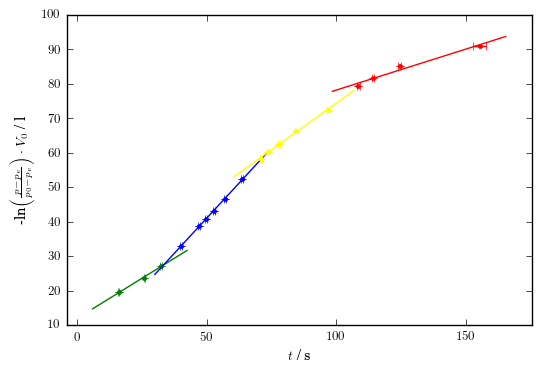

In [8]:
ptKurveDreh(p_D, p0D, peD, t_1D, t_2D, t_3D, t_4D, t_5D, VD, "test")

## Funktion zur Bestimmung des Saugvermögens S aus der p(t)-Kurve für die Turbopumpe

In [15]:
def ptKurveTurbo(p, p0, pe, t1, t2, t3, t4, t5, t6, V, name):
    n = len(p)
    t = np.zeros(n)
    terr = np.zeros(n)
    V = np.array([V])

    # Mittelwert und Fehler der Zeit
    for i in range(n):
        t[i] = (t1[i] + t2[i] + t3[i] + t4[i] + t5[i] + t6[i]) / 6
        terr[i] = stats.sem([t1[i], t2[i], t3[i], t4[i], t5[i], t6[i]])
    print("t = ", t)
    print("terr = ", terr)
    
    # Fehler vom Druck
    perr = p * 0.1
    
    # y-Achse
    logP = -np.log( (p-pe) / (p0-pe) ) * unp.nominal_values(V)
    print("y-Achse des Plottes =", logP)
    
    # Bereiche bestimmen und lineare Regression
    t_1 = t[1:9]
    terr_1 = terr[1:9]
    logP_1 = logP[1:9]
    params_1, covariance_1 = curve_fit(f, t_1, logP_1)
    errors_1 = np.sqrt(np.diag(covariance_1))
    t1 = np.linspace(t_1[0]-2, t_1[-1]+2)
    print("Parameter a und b =", params_1, "+-", errors_1)
    
    t_2 = t[9:16]
    terr_2 = terr[9:16]
    logP_2 = logP[9:16]
    params_2, covariance_2 = curve_fit(f, t_2, logP_2)
    errors_2 = np.sqrt(np.diag(covariance_2))
    t2 = np.linspace(t_2[0]-2, t_2[-1]+2)
    print("Parameter a und b =", params_2, "+-", errors_2)
    
    t_3 = t[16:19]
    terr_3 = terr[16:19]
    logP_3 = logP[16:19]
    print((p-pe) / (p0-pe))
    print(logP_3)
    params_3, covariance_3 = curve_fit(f, t_3, logP_3)
    errors_3 = np.sqrt(np.diag(covariance_3))
    t3 = np.linspace(t_3[0]-2, t_3[-1]+2)
    print("Parameter a und b =", params_3, "+-", errors_3)
    
    # plottet alles
    plt.plot(t, logP, 'y.')
    plt.errorbar(t_1, logP_1, xerr=terr_1, yerr=0, c='green', fmt='.')
    plt.plot(t1, f(t1, *params_1), c='green')
    
    plt.errorbar(t_2, logP_2, xerr=terr_2, yerr=0, c='blue', fmt='.')
    plt.plot(t2, f(t2, *params_2), c='blue')
    
    plt.errorbar(t_3, logP_3, xerr=terr_3, yerr=0, c='red', fmt='.')
    plt.plot(t3, f(t3, *params_3), c='red')
    
    plt.xlabel(r'$t$ / s')
    plt.ylabel(r'-ln$\left(\frac{p-p_e}{p_0-p_e}\right)\cdot V_0$ / l')
    plt.xlim(t[0]-2, t[-1]+2)
    plt.legend(loc='best')
    plt.savefig("pictures/pt-Kurve-Turbopumpe.pdf")

In [16]:
ptKurveTurbo(p_T, p0T, peT, t_1T, t_2T, t_3T, t_4T, t_5T, t_6T, VT, "test" )

t =  [  0.53333333   1.58333333   1.73333333   1.98333333   2.25         2.51666667
   2.91666667   3.4          4.16666667   5.4          5.76666667   6.
   6.35         6.73333333   7.26666667   8.03333333   9.28333333
  10.56666667  14.63333333]
terr =  [ 0.10219806  0.08724168  0.10540926  0.11948966  0.1147461   0.12494443
  0.10775487  0.12909944  0.14757296  0.15275252  0.15634719  0.12909944
  0.14317821  0.1498147   0.15420045  0.18196459  0.24686929  0.38180856
  1.47978977]
y-Achse des Plottes = [  7.57672847  14.23831139  15.22923924  16.35631113  17.66298663
  19.21756093  21.13664678  23.64527839  27.27482068  33.93640359
  35.0333296   36.29963774  37.79736238  39.63042919  41.99366334
  45.3244548   51.0184804   56.712506            inf]
Parameter a und b = [ 5.04111588  6.39577798] +- [ 0.05025076  0.13561792]
Parameter a und b = [ 4.42237385  9.79659309] +- [ 0.07790974  0.51123923]
[ 0.39759036  0.17670683  0.15662651  0.13654618  0.11646586  0.09638554
  0.07630522 

/home/philip/.local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in log


ValueError: array must not contain infs or NaNs

# Bestimmung des Saugvermögens über die Leckrate

## Für die Drehschieberpumpe

In [11]:
Leckrate(pD1, p_gD1, t1D1, t2D1, t3D1, VD, "0.1mbar-D")
Leckrate(pD2, p_gD2, t1D2, t2D2, t3D2, VD, "0.4mbar-D")
Leckrate(pD3, p_gD3, t1D3, t2D3, t3D3, VD, "0.6mbar-D")
Leckrate(pD4, p_gD4, t1D4, t2D4, t3D4, VD, "0.8mbar-D")
Leckrate(pD5, p_gD5, t1D5, t2D5, t3D5, VD, "1.0mbar-D")

Druck p[mbar] = [ 0.2  0.4  0.6  0.8  1. ]
Fehler vom Druck perr = [ 0.02  0.04  0.06  0.08  0.1 ]
Mittelwert der Zeit t[s] = [  11.66666667   46.66666667   94.66666667  141.          177.        ]
Fehler der Zeit terr = [ 0.33333333  0.33333333  0.33333333  0.57735027  1.15470054]
Parameter a und b = [ 0.00469161  0.15805079]  +-  [ 0.00014942  0.01670424]
Saugvermögen S[l/s] = 0.394+/-0.032
 
Druck p[mbar] = [ 0.6  0.8  1.   2.   4. ]
Fehler vom Druck perr = [ 0.06  0.08  0.1   0.2   0.4 ]
Mittelwert der Zeit t[s] = [  6.66666667  14.33333333  20.          50.66666667  99.        ]
Fehler der Zeit terr = [ 0.33333333  0.33333333  0.          0.33333333  0.57735027]
Parameter a und b = [ 0.03697076  0.27018165]  +-  [ 0.00137194  0.07000391]
Saugvermögen S[l/s] = 0.78+/-0.06
 
Druck p[mbar] = [ 0.8  1.   2.   4.   6. ]
Fehler vom Druck perr = [ 0.08  0.1   0.2   0.4   0.6 ]
Mittelwert der Zeit t[s] = [  4.           7.33333333  24.66666667  54.          81.        ]
Fehler der Zeit te

## Für die Turbopumpe

In [12]:
Leckrate(pT1, p_gT1, t1T1, t2T1, t3T1, VT, "5mbar-T")
Leckrate(pT2, p_gT2, t1T2, t2T2, t3T2, VT, "10mbar-T")
Leckrate(pT3, p_gT3, t1T3, t2T3, t3T3, VT, "15mbar-T")
Leckrate(pT4, p_gT4, t1T4, t2T4, t3T4, VT, "20mbar-T")

Druck p[mbar] = [ 0.0002  0.0004  0.0006  0.0008  0.001   0.002   0.003   0.004   0.005 ]
Fehler vom Druck perr = [  2.00000000e-05   4.00000000e-05   6.00000000e-05   8.00000000e-05
   1.00000000e-04   2.00000000e-04   3.00000000e-04   4.00000000e-04
   5.00000000e-04]
Mittelwert der Zeit t[s] = [  1.63333333   4.9          8.03333333  10.93333333  14.8         28.4
  41.16666667  52.33333333  63.4       ]
Fehler der Zeit terr = [ 0.08819171  0.1         0.14529663  0.20275875  0.3         0.6244998
  1.09898943  1.24409717  1.27671453]
Parameter a und b = [  7.71261630e-05  -4.44069433e-05]  +-  [  1.79337227e-06   5.88433410e-05]
Saugvermögen S[l/s] = 12.7+/-1.0
 
Druck p[mbar] = [ 0.0002  0.0004  0.0006  0.0008  0.001   0.002   0.004   0.006   0.008 ]
Fehler vom Druck perr = [  2.00000000e-05   4.00000000e-05   6.00000000e-05   8.00000000e-05
   1.00000000e-04   2.00000000e-04   4.00000000e-04   6.00000000e-04
   8.00000000e-04]
Mittelwert der Zeit t[s] = [  0.23333333   1.03333333